### **Topic Modelling on Disneyland Reviews(Hong Kong)**

Our analysis involves customer reviews and ratings from three Disney branches. Customers have rated their experiences on a scale of 1 to 5, with ratings of 1 to 3 indicating negative review and ratings of 4 and 5 indicating positive review.

We will conduct separate topic modeling analyses on the positive and negative reviews for each branch. Our aim is to identify the topics that are contributing to positive feedback and attracting customers, as well as the topics that are leading to negative feedback.Identifying the positive aspects will help us understand the reasons for customer footfall and identifying the negative aspects will enable us to address the issues and improve the overall customer experience.

We aim to perform Topic modeling for each branch, extracting topics on a monthly and seasonal basis. Our aim was to explore how the topics discussed by people are influenced by the month or season

Our ultimate goal is to help the Disneyland authorities address customer feedback and improve their services.


**We will be focussing on Disneyland Hong Kong in this notebook**

### **Research questions**

1.  a. What are the key topics mentioned in positive customer reviews of Disneyland Hong Kong<BR>
    b. Key topics mentioned in negative customer reviews of Disneyland Hong Kong
2.  How do these topics vary across different months in Disneyland Hong Kong.
3.  How do these topics vary across different seasons in Disneyland Hong Kong.
4.  How can this information be used to enhance the customer experience and address any issues affecting customer satisfaction.


### **Table of contents**


1. **Topic Modeling for Hongkong**<br>
    a. For Positive Reviews<br>
    b. For Negative Reviews<br>
2. **Topics across different months** : Learn k topics across all the reviews and then compute average topic distribution month by month.See change in topic distribution and analyze the reason<br>
3. **Topics across different seasons** : Learn k topics across all the reviews and then compute average topic distribution across season.See change in topic distribution and analyze the reason<br>
4. **Suggestions for Disneyland HongKong**

#### Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import names 
import random
import nltk 
import calendar
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import pandas as pd
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
import re
from nltk.corpus import treebank
from sklearn_crfsuite import CRF
from sklearn_crfsuite import metrics
from nltk.corpus import brown
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from gensim import corpora
import gensim
from gensim.models.coherencemodel import CoherenceModel

### Reading Data and Data Preprocessing

In [11]:
reviews_df = pd.read_csv('/Users/aasthatandon/Library/Mobile Documents/com~apple~CloudDocs/CSUEB materials/Spring 2023/BAN 676/Project/BAN675/Team Project/Data/DisneylandReviews.csv', encoding='latin-1')
reviews_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [12]:
reviews_df.shape

(42656, 6)

##### Data Cleaning

In [13]:
# Clean out Disney location references and ride references
reviews_df['Review_Text'] = reviews_df['Review_Text'].str.replace(r"disney(?:land| park)?|park|place|hong kong|hk|cali|california|paris|pa|fr|Disneyland Railroad|\
                            Great Moments with Mr. Lincoln | Lincoln| The Disney Gallery | Gallery| Main Street Vehicles | \
                            Main Street Cinema | Main Street | Walt Disney's Enchanted Tiki Room | Enchanted Tiki Room | Jungle Cruise | \
                            Indiana Jones | Pirates of the Caribbean | Haunted Mansion | \
                            Davy Crockett Explorer Canoes | Davy Crockett | Explorer Canoes | Many Adventures of Winnie the Pooh | Winnie the Pooh | Splash Mountain | \
                            Big Thunder Mountain Railroad | Mark Twain Riverboat | Mark Twain | Frontierland Shootin Exposition |Frontierland| \
                            Pirate's Lair on Tom Sawyer Island | Pirate's Lair | Tom Sawyer | Sailing Ship Columbia | \
                            Mickey's House | Meet Mickey | Minnie's House | Roger Rabbit's Car Toon Spin | Roger Rabbit | \
                            Chip 'n' Dale's Gadget Coaster | Gadget Coaster | Fantasyland Theatre | It's a Small World | Small World | \
                            Mr. Toad's Wild Ride | Peter Pan's Flight | Pinocchio's Daring Journey | Pixie Hollow |\
                            Snow White's Enchanted Wish | Snow White | Enchanted Wish | Storybook Land Canal Boats | Storybook Land| Canal Boats |Dumbo the Flying Elephant | Dumbo |\
                            Casey Jr. Circus Train | Circus Train | Alice in Wonderland | Matterhorn Bobsleds | Bobsleds | King Arthur Carrousel | King Arthur |\
                            Mad Tea Party | Sleeping Beauty Castle Walkthrough | Sleeping Beauty| Astro Orbiter | \
                            Autopia Star Tours – The Adventures Continue | Autopia Star Tours | Buzz Lightyear Astro Blasters | Buzz Lightyear | Astro Blasters |\
                            Space Mountain | Monorail | Finding Nemo Submarine Voyage | Finding Nemo | Submarine Voyage |\
                            Star Wars Launch Bay | Star Wars | Millennium Falcon: Smuggler's Run | Millennium Falcon | Smuggler's Run| Rise of the Resistance | \
                            Electrical Parade | Galaxy's Edge | Tomorrowland | Fantasyland | \
                            Mickey's Toontown | Toontown | Frontierland | Critter Country | New Orleans Square | Adventureland | \
                            Main Street, U.S.A.| toy story | lion king | main street | small world | sce mountain | \
                            story land | king show | mickey mouse | grizzly gulch | mystic manor | \
                            big thunder mountain | chinese new year | slinky dog ride | jungle river cruise | lion king show | \
                            toy story| festival lion king | runaway mine cars | mine cars | iron man |\
                            big grizzly mountain | sunny bay station | small world | mountain runaway mine | \
                            iron man experience | sleeping beauty castle | sce mountain | buzz light year | \
                            big thunder | iron man experience | mickey | minnie | \
                            big grizzley | buzz lightyear | mountain",'')

/var/folders/w4/m7nmrzlx639_9y3p7hm312p40000gn/T/ipykernel_10076/4290222359.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df['Review_Text'] = reviews_df['Review_Text'].str.replace(r"disney(?:land| park)?|park|place|hong kong|hk|cali|california|paris|pa|fr|Disneyland Railroad|\


In [2]:
common_words1 = ["disneyland","disneyland_Paris","disneyland_HongKong","usa","world",
                 "disneyworld","disney","kong","hong","paris","california","States","park","ok",
                "one","go","get","the", "them", "your","us","lot","day","hk","realli","would","take","also",
                "year","see","land","much","great","visit","time","kid","went","even","around","children",
                "place","attract","ticket","mani","everi","still","back","peopl","etc", "dont","make","take","now","ride","om",
                "like","good","small","ss","comr"
                ]

##### Branch

In [14]:
reviews_df['Location'] = reviews_df.Branch.str[11:]
reviews_df.drop(columns="Branch", inplace=True)
reviews_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Location
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great comct . Unfortunately...,HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


##### Removing Missing Year_Month

In [15]:
#To select rows whose column value equals 'missing' in 'Year_Month':
missing = reviews_df.loc[reviews_df['Year_Month'] == 'missing']
#keep the missing rows seperate
reviews_df = reviews_df[reviews_df.Year_Month != 'missing']
reviews_df.shape

(40043, 6)

##### Extracting Year and Month

In [16]:
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Year_Month']).year
reviews_df['Year'] = pd.to_numeric(reviews_df['Year'])
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Year_Month']).month
reviews_df['Month'] = pd.to_numeric(reviews_df['Month'])
reviews_df.drop('Year_Month', axis=1, inplace = True)
reviews_df = reviews_df.reset_index(drop=True)
reviews_df.head(5)

,Review_ID,Rating,Reviewer_Location,Review_Text,Location,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great comct . Unfortunately...,HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4


##### HongKong Branch

In [17]:
#Define Hong Kong Branch
hk_df = reviews_df[reviews_df['Location']=='HongKong']
hk_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Location,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great comct . Unfortunately...,HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4


### 1 a. Build the Topic Model for Disneyland HongKong Positive Reviews

In [18]:
def sentiment(df):
    pos_reviews=[]
    neg_reviews=[]
    for idx,row in df.iterrows():
        if row['Rating']==4 or row['Rating']==5:
            pos_reviews.append(row['Review_Text'])
        else:
            neg_reviews.append(row['Review_Text'])
    return pos_reviews,neg_reviews

In [19]:
hk_pos_reviews, hk_neg_reviews = sentiment(hk_df)
hk_pos_reviews[0]

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [85]:
###  select the number of topics ###check on this 
stop = stopwords.words('english')

def clean(doc):
    """
    Clean review
    args:
        doc: review (stry type)
    returns:
        cleaned review
    """
    stemmer=PorterStemmer()
    lowercase=[i.lower() for i in nltk.word_tokenize(doc) if i.lower() not in stop and i.isalpha()] 
    normalized=[stemmer.stem(i) for i in lowercase]
    normalized = [i for i in normalized if i not in common_words1]
    
    return normalized

def grid_search_on_num_topics(reviews, topics = [2,3,4,5,6,7]):
    """
    Do grid search on number of topics for topic modelling.
    args:
        reviews: list of reviews (list of str types)
    returns:
        
    """
    Lda = gensim.models.ldamodel.LdaModel
    contents=[clean(x) for x in reviews]
    dictionary = corpora.Dictionary(contents)
    #preparing data
    doc_term_matrix=[dictionary.doc2bow(doc) for doc in contents]# frequency of words in dict

    for i in topics:
        ldamodel = Lda(
            doc_term_matrix, num_topics=i, id2word = dictionary, passes=50, chunksize=10
        )
        #computing coherence score for the model
        cm = CoherenceModel(model=ldamodel,texts=contents, corpus=doc_term_matrix, coherence='c_v', processes=5)
        coherence = cm.get_coherence()
        print(f"with {i} topics, the coherence is {coherence}" )
        
        # Compute Perplexity
        #perplexity = ldamodel.log_perplexity(doc_term_matrix)
        #print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.
        #print(f"with {i} topics, the coherence is {coherence} , perplexity is {perplexity}" )
        
        # Compute Coherence Score
        #coherence_model_lda22 = CoherenceModel(model=lda_model22, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        #coherence_lda22 = coherence_model_lda22.get_coherence()
        #print('\nCoherence Score: ', coherence_lda22)

# the bigger the coherence, the better the model coherence
# we pick the number of topics that when the increase of coherence score becomes slower



In [100]:
grid_search_on_num_topics(hk_pos_reviews, topics = [2,4,6])

with 2 topics, the coherence is 0.44104688808812353
with 4 topics, the coherence is 0.40773361215515624
with 6 topics, the coherence is 0.3418004033782574


Based on this, we would be choosing the number of topic to be 2.Higher coherence, better the model.

We choose the topic to be 2

In [87]:
def topic_model(reviews,num_topics=2):
    Lda = gensim.models.ldamodel.LdaModel
    contents = [clean(x) for x in reviews]
    dictionary = corpora.Dictionary(contents)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in contents]
    ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary)
    return ldamodel, dictionary


In [88]:
hk_ldamodel_pos, _ = topic_model(hk_pos_reviews,num_topics=2)
print(hk_ldamodel_pos.print_topics(num_topics=2, num_words=10))

[(0, '0.008*"food" + 0.007*"love" + 0.007*"famili" + 0.006*"fun" + 0.006*"well" + 0.006*"experi" + 0.006*"line" + 0.006*"smaller" + 0.006*"theme" + 0.005*"show"'), (1, '0.014*"show" + 0.012*"enjoy" + 0.011*"firework" + 0.010*"rade" + 0.009*"food" + 0.008*"fun" + 0.008*"queue" + 0.007*"love" + 0.007*"wait" + 0.007*"charact"')]


In [89]:
#Plot Wordcloud of Top 10 words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

def topic_wordcloud(ldamodel,num_topics=4):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    cloud = WordCloud(stopwords=stop + common_words1,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=15,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = ldamodel.show_topics(formatted=False)
    row = num_topics//2

    fig, axes = plt.subplots(row, 2, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show();
    

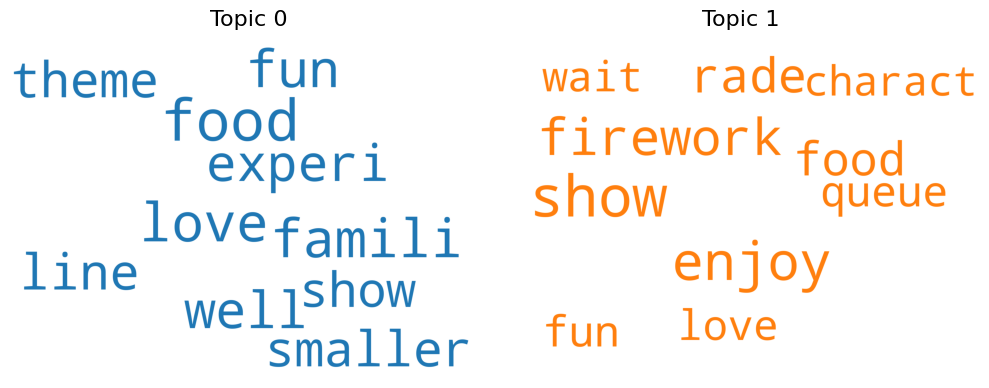

In [90]:
topic_wordcloud(hk_ldamodel_pos,num_topics=2)


- Topic 0: Experience of Attending a Theme Park

This topic could explore the different aspects of visiting a theme park, such as the food, theme, shows and overall experience.It could also delve into the excitement and fun of going to a theme park, and how it can create lasting memories with family and friends.It could also discuss tips for making the most out of a theme park visit, such as how to navigate long lines.

- Topic 1: Enjoyment of Firework Shows

This topic could focus specifically on the experience of watching firework shows. 
The topic could also discuss the emotions and feelings associated with watching fireworks, such as joy, fun, and loving it all.
Additionally, it could also be possiblu discuss about navigating the long queues to see the firework.

### 1 b. Build the Topic Model for Disneyland HongKong Positive Reviews

In [99]:
grid_search_on_num_topics(hk_neg_reviews, topics = [2,4,6])

with 2 topics, the coherence is 0.38064786934884276
with 4 topics, the coherence is 0.29846912639475953
with 6 topics, the coherence is 0.2928638357316495


In [92]:
hk_ldamodel_neg, _ = topic_model(hk_neg_reviews,num_topics=2)
print(hk_ldamodel_neg.print_topics(num_topics=2, num_words=10))

[(0, '0.011*"queue" + 0.011*"food" + 0.007*"wait" + 0.006*"enjoy" + 0.006*"crowd" + 0.006*"long" + 0.006*"show" + 0.005*"rade" + 0.005*"disappoint" + 0.005*"theme"'), (1, '0.009*"line" + 0.007*"food" + 0.007*"wait" + 0.006*"disappoint" + 0.006*"show" + 0.006*"experi" + 0.006*"hour" + 0.006*"staff" + 0.006*"expect" + 0.005*"charact"')]


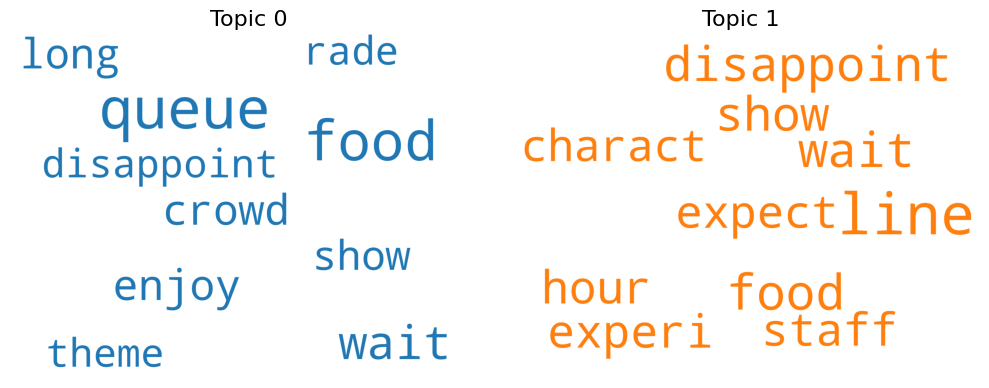

In [93]:
topic_wordcloud(hk_ldamodel_neg,num_topics=2)

Topic 0 : Disappointing experience at a crowded theme park<BR>
The first negative topic explores the downsides of visiting popular theme parks, such as overcrowding, long wait times, and disappointment with attractions or food. 


Topic 1 :
The frustrations and challenges of dining out at busy restaurants:<BR>This topic focuses on the challenges and frustrations of dining out at busy restaurants, such as dealing with long wait times, slow service, and food that fails to meet expectations. 

### 2. Topics across different months : 
##### Learn k topics across all the reviews and then compute average topic distribution month by month.See change in topic distribution and analyze the reason

In [94]:
hk_all_reviews = hk_pos_reviews + hk_neg_reviews #all reviews of disneyland hongkong
random.shuffle(hk_all_reviews)

In [101]:
grid_search_on_num_topics(hk_all_reviews, topics = [2,3,4])# grid search on no. of topics

with 2 topics, the coherence is 0.43227865361281315
with 3 topics, the coherence is 0.4568267800168598
with 4 topics, the coherence is 0.4112518705725818


Based on the coherence score, we will be learning two topics for all the reviews.

In [96]:
hk_ldamodel_all, hk_dictionary_all = topic_model(hk_all_reviews,num_topics=4)
print(hk_ldamodel_all.print_topics(num_topics=4, num_words=10))

[(0, '0.010*"wait" + 0.008*"line" + 0.008*"rade" + 0.007*"experi" + 0.007*"firework" + 0.006*"fun" + 0.006*"first" + 0.006*"mountain" + 0.006*"crowd" + 0.006*"open"'), (1, '0.019*"food" + 0.009*"well" + 0.009*"line" + 0.009*"staff" + 0.008*"theme" + 0.008*"expens" + 0.007*"experi" + 0.007*"nice" + 0.007*"love" + 0.007*"smaller"'), (2, '0.020*"show" + 0.016*"enjoy" + 0.011*"rade" + 0.011*"firework" + 0.009*"food" + 0.009*"fun" + 0.008*"queue" + 0.008*"love" + 0.007*"mickey" + 0.007*"charact"'), (3, '0.012*"queue" + 0.009*"old" + 0.008*"love" + 0.007*"line" + 0.007*"long" + 0.005*"food" + 0.005*"charact" + 0.005*"hotel" + 0.005*"wait" + 0.005*"walk"')]


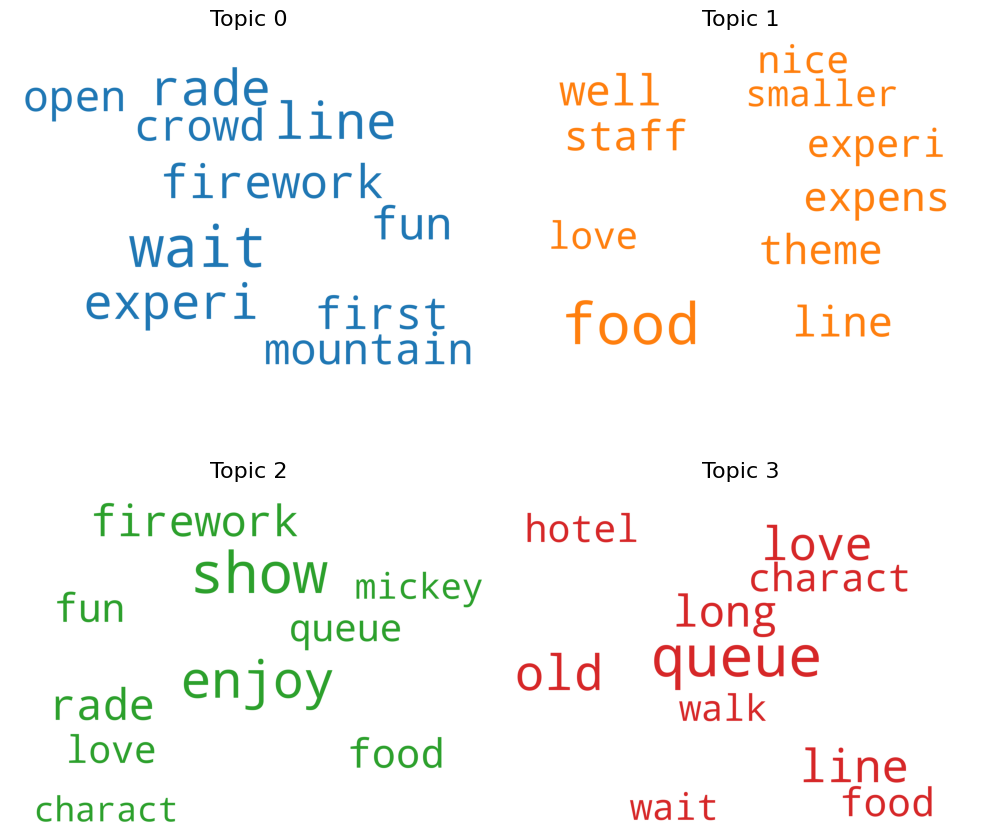

In [97]:
topic_wordcloud(hk_ldamodel_all, num_topics = 4)

We studied all the reviews of Hong Kong Disneyland to identify 4 topics, encompassing both positive and negative aspects.

- Topic 0 : Theme park experiences<BR>
This topic can focus on the general experience of visiting a theme park, including waiting in line, watching parades and fireworks, enjoying shows and attractions, and interacting with characters.

- Topic 1 : Food and dining:<BR>
This topic can cover the food and dining options available at theme parks, including the quality of the food, the variety of options, the cost, and the overall dining experience.

- Topic 2 : Entertainment:<BR>
This topic can explore the different forms of entertainment available at theme parks, such as shows, parades, and fireworks, as well as the characters and mascots that visitors can interact with.

- Topic 3 : Queue management
This topic can focus on the management of queues at theme parks, including how long visitors have to wait, the efficiency of the queue system, and ways to improve the overall queue experience.

Average topic distribution for each month for HK

In [102]:
hk_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Location,Year,Month,Season
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,Spring
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,Spring
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,Spring
3,670607911,4,Australia,HK Disneyland is a great comct . Unfortunately...,HongKong,2019,4,Spring
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,Spring


In [103]:
def get_reviews_by_month(df):
    month_review = {m:[] for m in range(1,13)}
    for month in month_review:
        mon_true = df['Month'] == month
        reviews = list(df[mon_true]['Review_Text'])
        month_review[month] = reviews
    return month_review

In [104]:
hk_month_reviews = get_reviews_by_month(hk_df)

In [105]:
# write a functon that returns average topic distribution 
def get_avg_topic_dist(ldamodel, dictionary, reviews, num_topics=4):
    review_topic_dist = []
    for review in reviews:
        clean_review = clean(review)
        doc_term_matrix = [dictionary.doc2bow(clean_review)]
        topic_dist = ldamodel.get_document_topics(doc_term_matrix[0]) #get topic distribution
        template_dict=dict.fromkeys(range(num_topics),0) # we need to fill the missing topics in the distribution (missing because the loading is 0), this is to create a template of empty dictionary with all 0 values
        template_dict.update(topic_dist)
        topic_dist = [v for k,v in template_dict.items()]
        review_topic_dist.append(topic_dist)
    
    arr_topic_dist = np.asarray(review_topic_dist)
    review_topic_dist = list(np.mean(arr_topic_dist,axis=0))     
    return review_topic_dist


In [106]:
def plot_avg_topic_dist(avg_topic_dist, prefix=""):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)
    num_topics = len(avg_topic_dist)
    ax.bar(range(0, num_topics),avg_topic_dist)
    ax.set_title(prefix + "Average topic distribution")
    ax.set_xlabel("Topic Number")
    ax.set_ylabel("Topic weight")
    ax.set_ylim(0,1)
    ax.set_xticks(range(0, num_topics))
    ax.grid(alpha=0.1)
    plt.show()

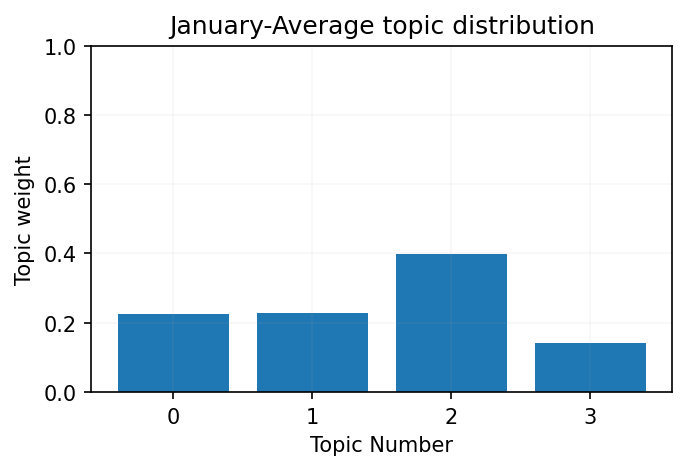

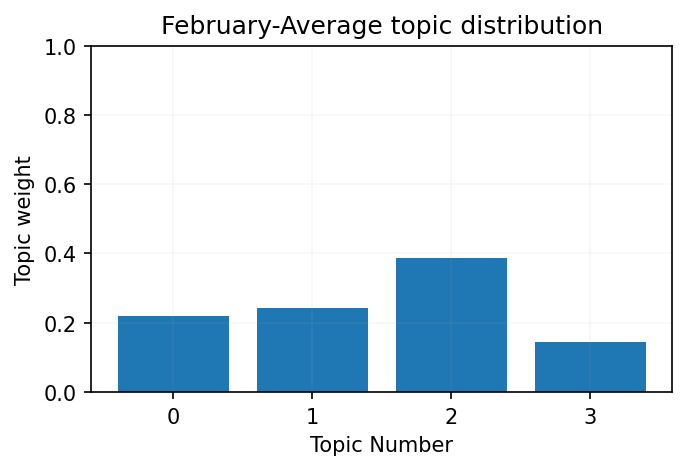

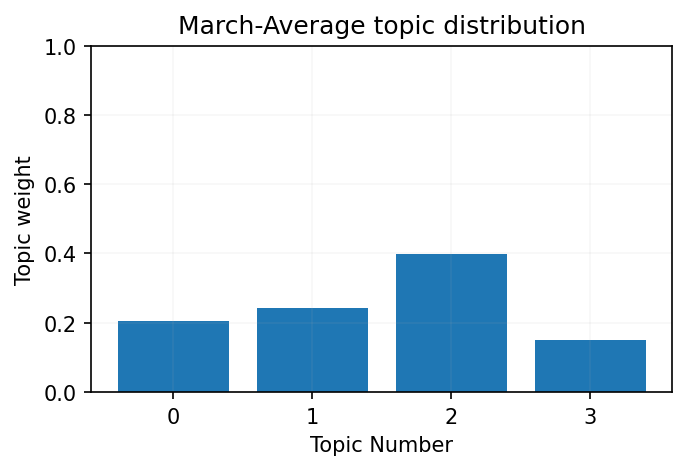

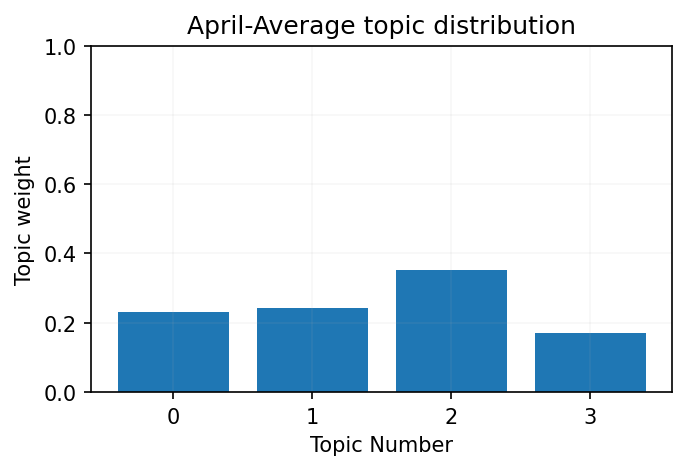

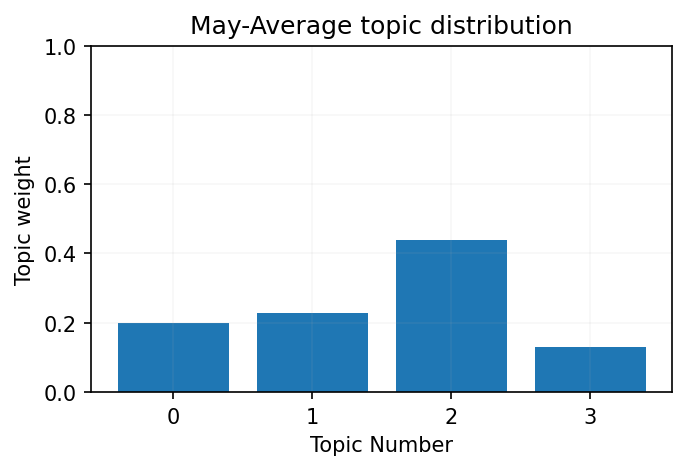

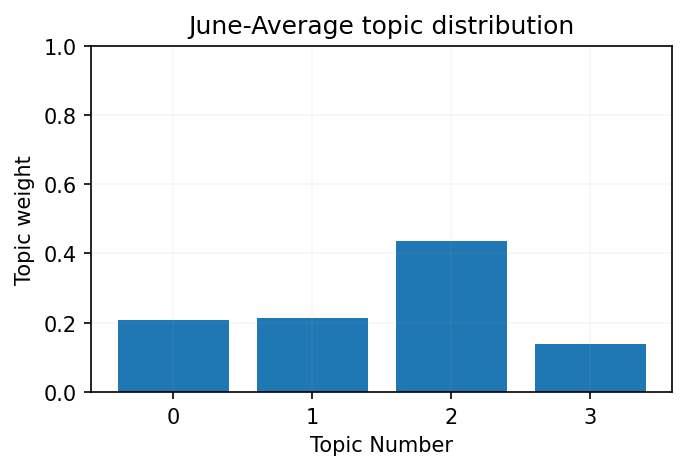

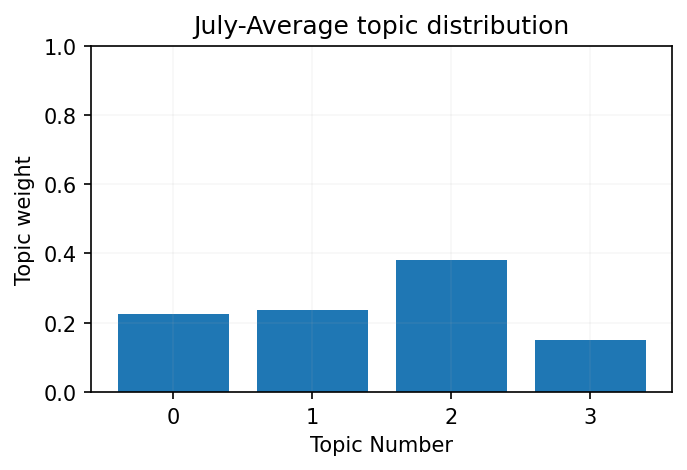

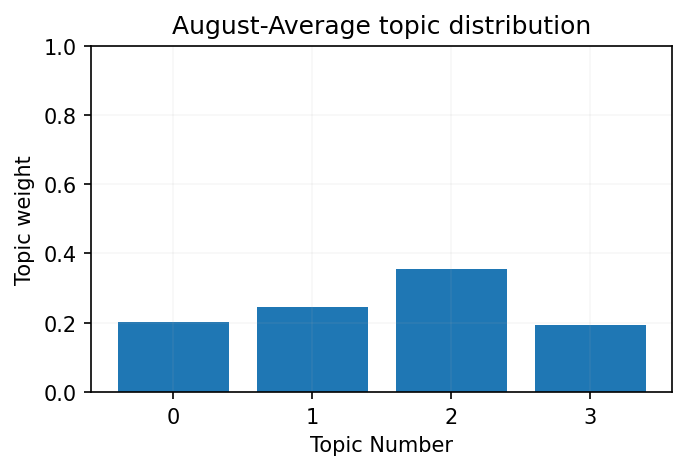

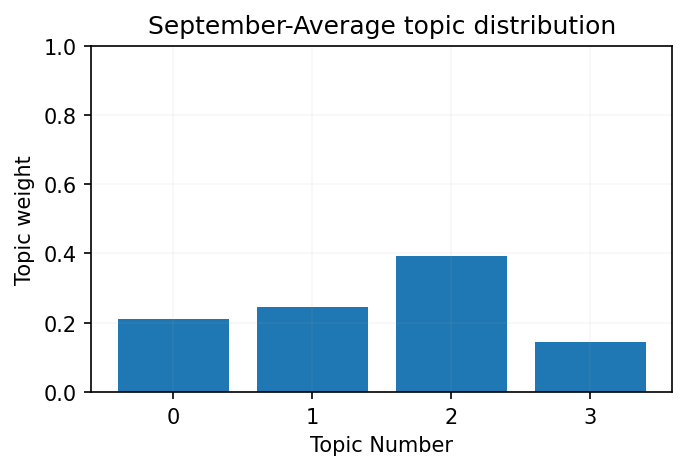

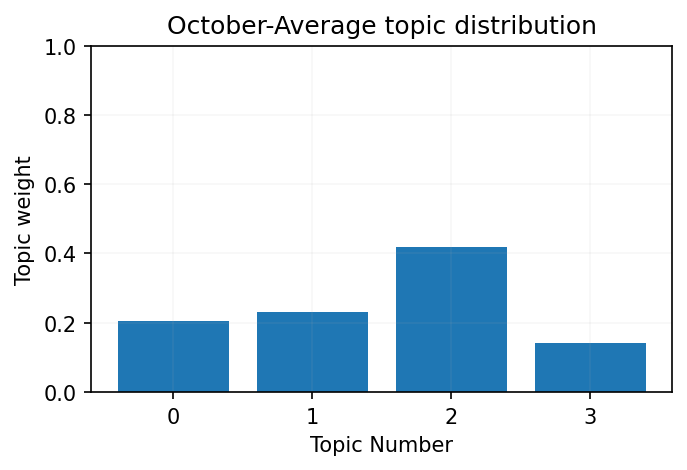

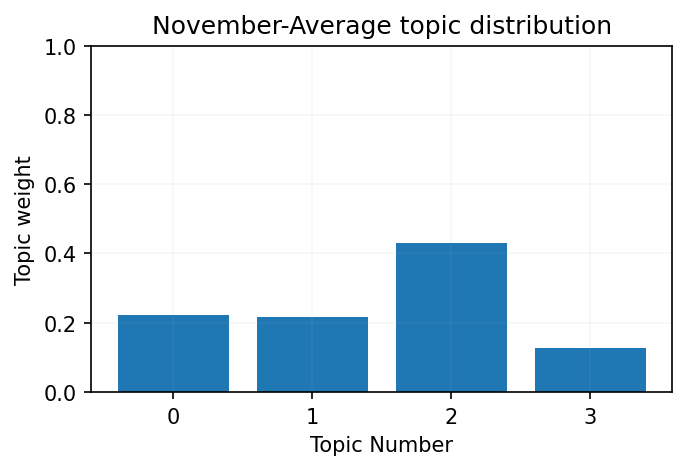

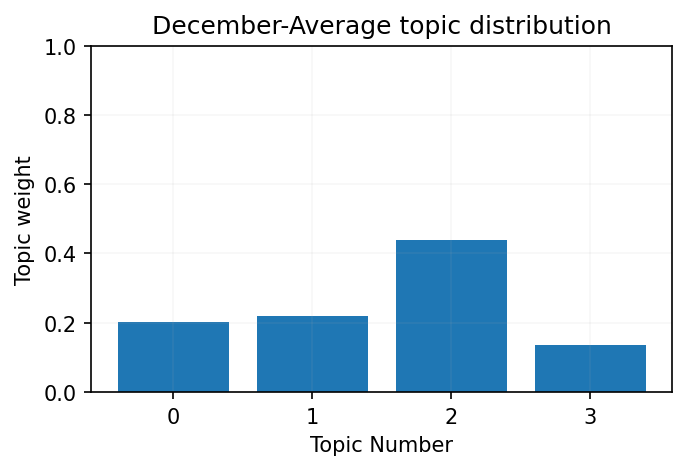

In [107]:
for month,reviews in hk_month_reviews.items():
    avg_topic_dist = get_avg_topic_dist(
        hk_ldamodel_all, hk_dictionary_all , hk_month_reviews[month]
    )
    #print(avg_topic_dist)
    month_string = calendar.month_name[month]
    plot_avg_topic_dist(avg_topic_dist,prefix=month_string + '-')

Topic 2 is most discussed and topic 3 is least discussed across the year. We will see the trend in seasons too.

### 3. Topics across different seasons : 
##### Learn k topics across all the reviews and then compute average topic distribution across season.See change in topic distribution and analyze the reason

Average topic distribution for each season for HK : We would analyze the topic distribution of the above four topics on overall reviews across various seasons of the year by computing the mean topic distribution for each season. This allowed us to observe any fluctuations in the prominence of these topics throughout the year.

In [112]:
def get_season_df(df):
    def find_season(month):
        season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Fall', 10:'Fall', 11:'Fall'}
        return season_month.get(month)

    season_list = []
    for month in df['Month']:
        season = find_season(month)
        season_list.append(season)
    df['Season'] = season_list
    return df

In [113]:
def get_reviews_by_season(df):
    df = get_season_df(df)
    season_review = {s:[] for s in ["Summer","Winter","Spring","Fall"]}
    for season in season_review:
        sea_true = df['Season'] == season
        reviews = list(df[sea_true]['Review_Text'])
        season_review[season] = reviews
    return season_review


In [114]:
hk_season_reviews = get_reviews_by_season(hk_df)

/var/folders/w4/m7nmrzlx639_9y3p7hm312p40000gn/T/ipykernel_10076/3732913003.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = season_list


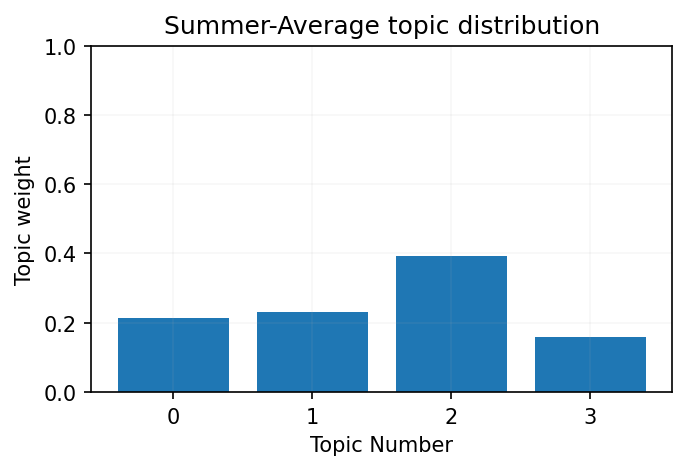

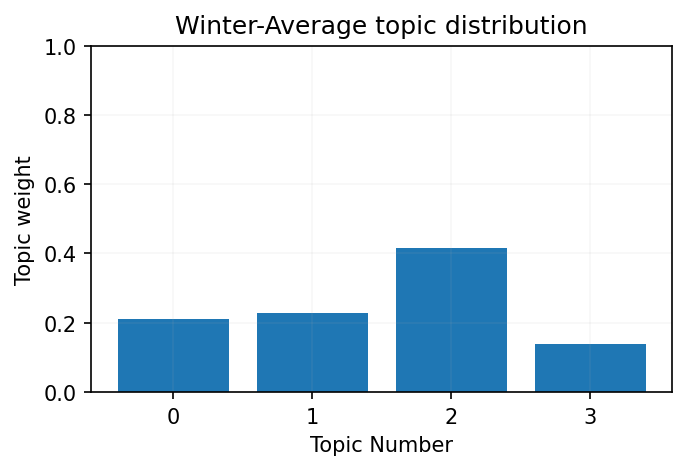

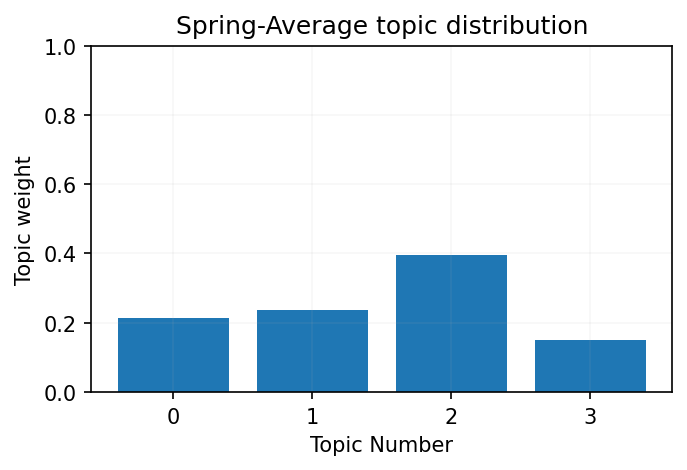

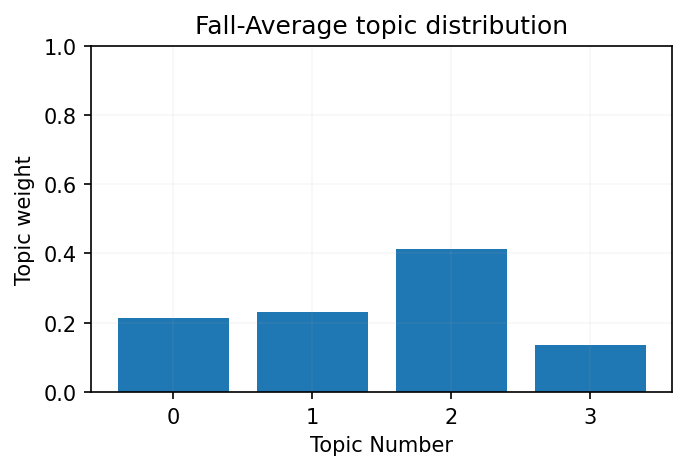

In [115]:
for season,reviews in hk_season_reviews.items():
    avg_topic_dist = get_avg_topic_dist(
        hk_ldamodel_all, hk_dictionary_all , hk_season_reviews[season]
    )
    plot_avg_topic_dist(avg_topic_dist, prefix=season + '-')

Similar to monthwise analysis, Topic 2 is most discussed and topic 3 is least discussed across the seasons.The reason why Topic 2 (entertainment) is most discussed and Topic 3 (queue management) is least discussed in Disneyland Hong Kong could be due to the importance, experience, perception, and marketing efforts. Visitors may be having such a great time enjoying the shows, parades, and attractions that they do not focus on discussing the queues. In this scenario, it is not necessarily that the queue management is quite good, but it may happen that the visitors are having such a positive experience with the entertainment options that it takes precedence in their discussions and memories of the park.

### 4. Suggestions for Disneyland HongKong:


To address the negative experiences associated with overcrowding, long wait times, and dining frustrations at Disneyland Hong Kong, several strategies could be implemented. These include managing visitor capacity, expanding attraction and dining options, improving communication, increasing staffing levels, using technology, and enhancing menu offerings. Furthermore, the park's popular entertainment options, such as shows, parades, fireworks, and character interactions, have generated significant buzz among visitors. Disneyland Hong Kong could continue to focus on and expand these entertainment offerings to provide the best possible experience for its visitors.